In [1]:
from dstools.spark import init_spark2

spark = init_spark2({
    "appName": 'gobike_tripdata',
    "spark.sql.execution.arrow.enabled": "false"
})

from pyspark import *
from pyspark.sql import *
from pyspark.sql.types import *
from pyspark.sql.functions import *

In [2]:
%matplotlib inline
import pandas as pd

In [43]:
etl_sessions = spark.table('device_sb.test_sys_etl_session')\
.select('start_time', 'table_name', 'file_name', 'num_records')    

# Количество записей в сеансах загрузки в RAW

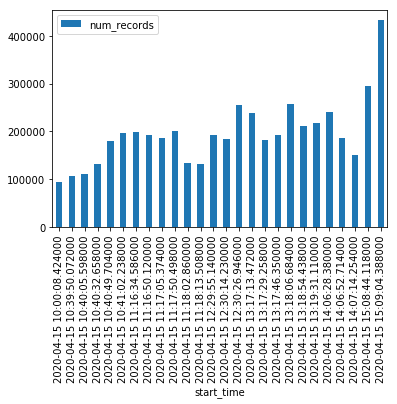

In [53]:
raw_sessions = etl_sessions\
    .where(col('table_name').rlike('raw'))\
    .orderBy('start_time')\
    .toPandas()\
    .plot(x='start_time', y='num_records', kind='bar')

# Рост количества записей в агрегате

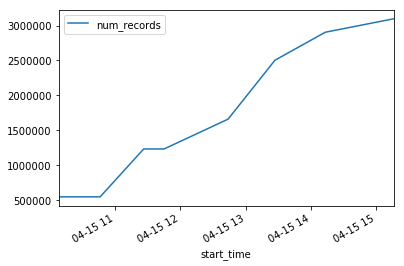

In [50]:
etl_sessions\
    .where(col('table_name').rlike('agg'))\
    .orderBy('start_time')\
    .toPandas()\
    .plot(x='start_time', y='num_records')

# График сезонности поездок

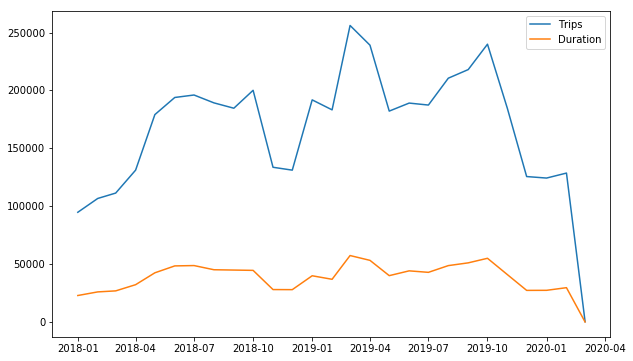

In [6]:
trips = spark.sql("""
select 
  trunc(trips_date, 'month') as Month,
  sum(trips_count) as Trips,
  round(sum(trips_duration) / 3600) as Duration
from device_sb.test_dm_gobike_trips_daily_agg
group by trunc(trips_date, 'month') 
order by trunc(trips_date, 'month') 
""")\
.toPandas()

from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.rcParams["figure.figsize"] = (10, 6)
plt.plot(trips.Month, trips.Trips)
plt.plot(trips.Month, trips.Duration)
plt.legend(['Trips', 'Duration'])
plt.show()